<a href="https://www.kaggle.com/code/absndus/data-science-portfolio-cleaning-us-census-data?scriptVersionId=135445136" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

## Data Science Portfolio - Cleaning US Census Data Notebook ##

### Created by: Albert Schultz ###

### Date Created: 06/29/2023 ###

### Version: 1.00 ###

### Executive Summary ###
This notebook goes over the process of cleaning the US Census Data that are stored in separate csv files. 

## Table of Contents ##

1. [Introduction](#1.-Introduction)
2. [Vision and Goals](#2.-Vision-and-Goals)
3. [Import the Datasets](#3.-Import-the-Datasets)
4. [Perform Dataset Transformation for Proper Data Extractions](#4.-Perform-Dataset-Transformation-for-Proper-Data-Extractions)
5. [Perform Exploration Data Analysis](#5.-Perform-Exploration-Data-Analysis)
6. [Summary](#Summary)

## 1. Introduction ##

In this notebook, I import the separate csv files of the US Census data and put them into a single CSV file using the glob() function prior to cleaning the dataset. Once imported and concated, the single dataframe will be cleaned further using various tools such as regex text finding, data .melt() method, str.split and pd.to_numeric for proper cleaning. 

**Initialize the Notebook for data access, import library modules, and set the working directory for this project.**

In [2]:
import pandas as pd #Pandas library module. 
import numpy as np #NumPy for statistical analysis. 
import matplotlib.pyplot as plt #For plotting advance graphs and scatter plots. 
import glob #For concatenating multiple same columns csv files. 
import re #For using regex for finding certain keywords or characters in the values. 
import os 
import matplotlib.ticker as mtick
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/uscensusdatasets/states1.csv
/kaggle/input/uscensusdatasets/states7.csv
/kaggle/input/uscensusdatasets/states6.csv
/kaggle/input/uscensusdatasets/states4.csv
/kaggle/input/uscensusdatasets/states8.csv
/kaggle/input/uscensusdatasets/states2.csv
/kaggle/input/uscensusdatasets/states9.csv
/kaggle/input/uscensusdatasets/states5.csv
/kaggle/input/uscensusdatasets/states0.csv
/kaggle/input/uscensusdatasets/states3.csv


## 2. Vision and Goals ##

In this vision, the cleaned data set of the concatenated csv file for the US Census data would be presented after the cleaning, transformation and exploration data analysis. 

**Vision:** To provide an easy to understand singular dataset of the US Census Data from the messy separate csv files. 

**Goals:**
1. Import the csv file and append the files into a single csv file as a dataframe in the Python IDE. 
2. Perform Extraction, Transformation (data) and Load the transformed singular dataset for inspections and data exploration. 
3. Perform data exploration analysis (EDA) on the cleaned and tidy dataset to understand the US Census Data. 

## 3. Import the Datasets ##

This section imports the datasets from separate csv files of the US Census Data and use **glob()** function to append the csv files together into a singular dataframe. 

1. Import the csv files from states*.csv group and perform a concatenation using the **globe** function. 

In [3]:
#Import the files using the glob.glob() function. 
files = glob.glob("/kaggle/input/uscensusdatasets/states*.csv")

# Combine all files in the list and export as CSV.
data = pd.concat([pd.read_csv(f) for f in files])

2. Print the columns. 

In [4]:
print(data.columns)

Index(['Unnamed: 0', 'State', 'TotalPop', 'Hispanic', 'White', 'Black',
       'Native', 'Asian', 'Pacific', 'Income', 'GenderPop'],
      dtype='object')


3. Print the dtypes below. 

In [5]:
data.dtypes

Unnamed: 0     int64
State         object
TotalPop       int64
Hispanic      object
White         object
Black         object
Native        object
Asian         object
Pacific       object
Income        object
GenderPop     object
dtype: object

**Data Review:** The races data is shown in columns and the income variable is set to a string instead of float. This would prevent proper analysis and plotting of the information, visually. 

4. Review the first five rows of the combined US Data Census dataset. 

In [6]:
data

,Unnamed: 0,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop
0,0,Colorado,5278906,20.78438003220608%,69.89557165861504%,3.546376811594201%,0.5738325281803548%,2.661996779388082%,NaN,$64657.801787164906,2648667M_2630239F
1,1,Connecticut,3593222,15.604830917874388%,67.6770531400966%,10.34806763285027%,0.12620772946859898%,4.021980676328502%,0.018599033816425123%,$76146.5605875153,1751607M_1841615F
2,2,Delaware,926454,8.82476635514019%,64.63271028037383%,20.743925233644834%,0.25981308411214965%,3.2686915887850483%,NaN,$61827.97663551402,448413M_478041F
3,3,District of Columbia,647484,9.165921787709499%,33.103910614525134%,51.77653631284915%,0.20055865921787713%,3.3832402234636865%,0.029608938547486034%,$75466.36363636363,306674M_340810F
4,4,Florida,19645772,21.3385426653884%,59.08374880153398%,15.165675934803444%,0.2104506232023015%,2.2831735378715257%,0.05151006711409391%,$50690.194986743794,9600009M_10045763F
5,5,Georgia,10006693,8.418242207460397%,54.28630556974962%,32.08829841594277%,0.18758303525804798%,3.0976494634644895%,0.046601941747572824%,$50811.08205128205,4883331M_5123362F
0,0,Ohio,11575977,3.6720843250595037%,75.90306018361096%,16.207276436586163%,0.16888813328799712%,1.6210812648758952%,0.022645358721523304%,$49655.24846625767,5662893M_5913084F
1,1,Oklahoma,3849733,10.0799043062201%,66.05942583732046%,8.314736842105255%,6.716842105263157%,1.8011483253588516%,0.10622009569377985%,$48100.85426653883,1906944M_1942789F
2,2,Oregon,3939233,11.441212121212132%,78.39551515151517%,1.730787878787877%,1.0002424242424257%,3.594909090909088%,0.3453333333333332%,$54271.90181818182,1948453M_1990780F
3,3,Pennsylvania,12779559,6.128013741411624%,77.38385384134914%,11.633947532791995%,0.11926920674578385%,2.7977514053716495%,0.019394128669581522%,$56170.46451005025,6245344M_6534215F


**Data Review:** The dollar sign in the **income** column would need to be removed and the **genderpop** column needs to be split by gender. The columns from the **genderpop** would be created and named to **male_pop** and **female_pop**. The races above as columns have some NaN with the percentage symbols that would need to be removed using the str. method. To make the race percentage readable, using the **{}.format()** function is necessary to make the data understandable. There may be duplicate rows that will be dealt with later in this notebook. 

## 4. Perform Dataset Transformation for Proper Data Extractions ##

This section contains steps to transform some of the columns and melting to ensure that the dataset of the US Census were properly transformed for loading and extraction of the dataset properly. 

1. Use regex to turn the **Income** column into a format that is ready for conversion into a numerical type by removing the **$** symbol from the income column. 

In [7]:
data['Income'] = data['Income'].apply(lambda x: re.sub(r'\$','', x))
data['income'] = pd.to_numeric(data['Income'])
data.dtypes

Unnamed: 0      int64
State          object
TotalPop        int64
Hispanic       object
White          object
Black          object
Native         object
Asian          object
Pacific        object
Income         object
GenderPop      object
income        float64
dtype: object

In [8]:
#View the first five rows of the updated data US census dataset.
data.head()

,Unnamed: 0,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop,income
0,0,Colorado,5278906,20.78438003220608%,69.89557165861504%,3.546376811594201%,0.5738325281803548%,2.661996779388082%,NaN,64657.801787164906,2648667M_2630239F,64657.801787
1,1,Connecticut,3593222,15.604830917874388%,67.6770531400966%,10.34806763285027%,0.12620772946859898%,4.021980676328502%,0.018599033816425123%,76146.5605875153,1751607M_1841615F,76146.560588
2,2,Delaware,926454,8.82476635514019%,64.63271028037383%,20.743925233644834%,0.25981308411214965%,3.2686915887850483%,NaN,61827.97663551402,448413M_478041F,61827.976636
3,3,District of Columbia,647484,9.165921787709499%,33.103910614525134%,51.77653631284915%,0.20055865921787713%,3.3832402234636865%,0.029608938547486034%,75466.36363636363,306674M_340810F,75466.363636
4,4,Florida,19645772,21.3385426653884%,59.08374880153398%,15.165675934803444%,0.2104506232023015%,2.2831735378715257%,0.05151006711409391%,50690.194986743794,9600009M_10045763F,50690.194987


In [9]:
#Format the Income column to only 2 decimal places and shows the first five rows of just the Income column. 
data['Income'] = data['Income'].astype(float).apply(lambda x: '{:.2f}'.format(x))
data['Income'].head() 

0    64657.80
1    76146.56
2    61827.98
3    75466.36
4    50690.19
Name: Income, dtype: object

2. Split the GenderPop column into separate columns called **women** and **men**. 

In [10]:
data[['male','female']] = data['GenderPop'].str.split('_', expand = True)
data = data.drop('GenderPop', axis = 1)


3. Print the columns with updated data. 

In [11]:
data.head()

,Unnamed: 0,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,income,male,female
0,0,Colorado,5278906,20.78438003220608%,69.89557165861504%,3.546376811594201%,0.5738325281803548%,2.661996779388082%,NaN,64657.80,64657.801787,2648667M,2630239F
1,1,Connecticut,3593222,15.604830917874388%,67.6770531400966%,10.34806763285027%,0.12620772946859898%,4.021980676328502%,0.018599033816425123%,76146.56,76146.560588,1751607M,1841615F
2,2,Delaware,926454,8.82476635514019%,64.63271028037383%,20.743925233644834%,0.25981308411214965%,3.2686915887850483%,NaN,61827.98,61827.976636,448413M,478041F
3,3,District of Columbia,647484,9.165921787709499%,33.103910614525134%,51.77653631284915%,0.20055865921787713%,3.3832402234636865%,0.029608938547486034%,75466.36,75466.363636,306674M,340810F
4,4,Florida,19645772,21.3385426653884%,59.08374880153398%,15.165675934803444%,0.2104506232023015%,2.2831735378715257%,0.05151006711409391%,50690.19,50690.194987,9600009M,10045763F


In [12]:
#Drop the income column. 
data = data.drop('income', axis = 1)

In [13]:
data.head()

,Unnamed: 0,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,male,female
0,0,Colorado,5278906,20.78438003220608%,69.89557165861504%,3.546376811594201%,0.5738325281803548%,2.661996779388082%,NaN,64657.80,2648667M,2630239F
1,1,Connecticut,3593222,15.604830917874388%,67.6770531400966%,10.34806763285027%,0.12620772946859898%,4.021980676328502%,0.018599033816425123%,76146.56,1751607M,1841615F
2,2,Delaware,926454,8.82476635514019%,64.63271028037383%,20.743925233644834%,0.25981308411214965%,3.2686915887850483%,NaN,61827.98,448413M,478041F
3,3,District of Columbia,647484,9.165921787709499%,33.103910614525134%,51.77653631284915%,0.20055865921787713%,3.3832402234636865%,0.029608938547486034%,75466.36,306674M,340810F
4,4,Florida,19645772,21.3385426653884%,59.08374880153398%,15.165675934803444%,0.2104506232023015%,2.2831735378715257%,0.05151006711409391%,50690.19,9600009M,10045763F


4. Remove the last character for both **male** and **female** columns. 

In [14]:
#Remove the M and F character from the last of the value line. 
data['male'] = data['male'].str.slice(stop = -1)
data['female'] = data['female'].str.slice(stop = -1)

In [15]:
#Print out the updated male and female columns. 
data.head()

,Unnamed: 0,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,male,female
0,0,Colorado,5278906,20.78438003220608%,69.89557165861504%,3.546376811594201%,0.5738325281803548%,2.661996779388082%,NaN,64657.80,2648667,2630239
1,1,Connecticut,3593222,15.604830917874388%,67.6770531400966%,10.34806763285027%,0.12620772946859898%,4.021980676328502%,0.018599033816425123%,76146.56,1751607,1841615
2,2,Delaware,926454,8.82476635514019%,64.63271028037383%,20.743925233644834%,0.25981308411214965%,3.2686915887850483%,NaN,61827.98,448413,478041
3,3,District of Columbia,647484,9.165921787709499%,33.103910614525134%,51.77653631284915%,0.20055865921787713%,3.3832402234636865%,0.029608938547486034%,75466.36,306674,340810
4,4,Florida,19645772,21.3385426653884%,59.08374880153398%,15.165675934803444%,0.2104506232023015%,2.2831735378715257%,0.05151006711409391%,50690.19,9600009,10045763


5. Convert both male and female columns into numeric data types. 

In [16]:
#Convert objects to numeric for male and female columns. 
data['male'] = pd.to_numeric(data['male'])
data['female'] = pd.to_numeric(data['female'])

In [17]:
data

,Unnamed: 0,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,male,female
0,0,Colorado,5278906,20.78438003220608%,69.89557165861504%,3.546376811594201%,0.5738325281803548%,2.661996779388082%,NaN,64657.80,2648667,2630239.0
1,1,Connecticut,3593222,15.604830917874388%,67.6770531400966%,10.34806763285027%,0.12620772946859898%,4.021980676328502%,0.018599033816425123%,76146.56,1751607,1841615.0
2,2,Delaware,926454,8.82476635514019%,64.63271028037383%,20.743925233644834%,0.25981308411214965%,3.2686915887850483%,NaN,61827.98,448413,478041.0
3,3,District of Columbia,647484,9.165921787709499%,33.103910614525134%,51.77653631284915%,0.20055865921787713%,3.3832402234636865%,0.029608938547486034%,75466.36,306674,340810.0
4,4,Florida,19645772,21.3385426653884%,59.08374880153398%,15.165675934803444%,0.2104506232023015%,2.2831735378715257%,0.05151006711409391%,50690.19,9600009,10045763.0
5,5,Georgia,10006693,8.418242207460397%,54.28630556974962%,32.08829841594277%,0.18758303525804798%,3.0976494634644895%,0.046601941747572824%,50811.08,4883331,5123362.0
0,0,Ohio,11575977,3.6720843250595037%,75.90306018361096%,16.207276436586163%,0.16888813328799712%,1.6210812648758952%,0.022645358721523304%,49655.25,5662893,5913084.0
1,1,Oklahoma,3849733,10.0799043062201%,66.05942583732046%,8.314736842105255%,6.716842105263157%,1.8011483253588516%,0.10622009569377985%,48100.85,1906944,1942789.0
2,2,Oregon,3939233,11.441212121212132%,78.39551515151517%,1.730787878787877%,1.0002424242424257%,3.594909090909088%,0.3453333333333332%,54271.90,1948453,1990780.0
3,3,Pennsylvania,12779559,6.128013741411624%,77.38385384134914%,11.633947532791995%,0.11926920674578385%,2.7977514053716495%,0.019394128669581522%,56170.46,6245344,6534215.0


In [18]:
data.dtypes

Unnamed: 0      int64
State          object
TotalPop        int64
Hispanic       object
White          object
Black          object
Native         object
Asian          object
Pacific        object
Income         object
male            int64
female        float64
dtype: object

6. Remove the NaN from both male and female and replace it with difference between the **TotalPop - male** population to get the **female pop**. 

In [19]:
data['male'] = data['male'].fillna(0).astype(int)
data['female'] = data['female'].fillna(data.TotalPop - data.male).astype(int) #Subtract from data.TotalPop - data.male column since the male column has all of the values filled. 
data

,Unnamed: 0,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,male,female
0,0,Colorado,5278906,20.78438003220608%,69.89557165861504%,3.546376811594201%,0.5738325281803548%,2.661996779388082%,NaN,64657.80,2648667,2630239
1,1,Connecticut,3593222,15.604830917874388%,67.6770531400966%,10.34806763285027%,0.12620772946859898%,4.021980676328502%,0.018599033816425123%,76146.56,1751607,1841615
2,2,Delaware,926454,8.82476635514019%,64.63271028037383%,20.743925233644834%,0.25981308411214965%,3.2686915887850483%,NaN,61827.98,448413,478041
3,3,District of Columbia,647484,9.165921787709499%,33.103910614525134%,51.77653631284915%,0.20055865921787713%,3.3832402234636865%,0.029608938547486034%,75466.36,306674,340810
4,4,Florida,19645772,21.3385426653884%,59.08374880153398%,15.165675934803444%,0.2104506232023015%,2.2831735378715257%,0.05151006711409391%,50690.19,9600009,10045763
5,5,Georgia,10006693,8.418242207460397%,54.28630556974962%,32.08829841594277%,0.18758303525804798%,3.0976494634644895%,0.046601941747572824%,50811.08,4883331,5123362
0,0,Ohio,11575977,3.6720843250595037%,75.90306018361096%,16.207276436586163%,0.16888813328799712%,1.6210812648758952%,0.022645358721523304%,49655.25,5662893,5913084
1,1,Oklahoma,3849733,10.0799043062201%,66.05942583732046%,8.314736842105255%,6.716842105263157%,1.8011483253588516%,0.10622009569377985%,48100.85,1906944,1942789
2,2,Oregon,3939233,11.441212121212132%,78.39551515151517%,1.730787878787877%,1.0002424242424257%,3.594909090909088%,0.3453333333333332%,54271.90,1948453,1990780
3,3,Pennsylvania,12779559,6.128013741411624%,77.38385384134914%,11.633947532791995%,0.11926920674578385%,2.7977514053716495%,0.019394128669581522%,56170.46,6245344,6534215


In [20]:
#Convert objects to numeric for male and female columns. 
data['male'] = pd.to_numeric(data['male'])
data['female'] = pd.to_numeric(data['female'])
data['Income'] = pd.to_numeric(data['Income'])

#See the male and female's dtypes and should be integer (discrete). 
data.dtypes

Unnamed: 0      int64
State          object
TotalPop        int64
Hispanic       object
White          object
Black          object
Native         object
Asian          object
Pacific        object
Income        float64
male            int64
female          int64
dtype: object

7. Remove the percentage and convert to contineous (float) for the percentage. 

In [21]:
#Remove the percentage from the last character of the value. 
data['Hispanic'] = data['Hispanic'].str.slice(stop=-1)
data['White'] = data['White'].str.slice(stop=-1)
data['Black'] = data['Black'].str.slice(stop=-1)
data['Native'] = data['Native'].str.slice(stop=-1)
data['Asian'] = data['Asian'].str.slice(stop=-1)
data['Pacific'] = data['Pacific'].str.slice(stop=-1)

#Convert to numeric. 
data['White'] = pd.to_numeric(data['White'])
data['Hispanic'] = pd.to_numeric(data['Hispanic'])
data['Black'] = pd.to_numeric(data['Black'])
data['Native'] = pd.to_numeric(data['Native'])
data['Asian'] = pd.to_numeric(data['Asian'])

#Fill in the row with NaN in the race columns (if any) and replace it with the difference out of the 100 - races = x. 
data['Pacific'] = data['Pacific'].fillna(100 - data.Hispanic - data.White - data.Black - data.Native - data.Asian).astype(float)

#Move the decimal places to only 2 places. 
data['Hispanic'] = data['Hispanic'].astype(float).apply(lambda x: '{:.4f}'.format(x))
data['White'] = data['White'].astype(float).apply(lambda x: '{:.4f}'.format(x))
data['Black'] = data['Black'].astype(float).apply(lambda x: '{:.4f}'.format(x))
data['Native'] = data['Native'].astype(float).apply(lambda x: '{:.4f}'.format(x))
data['Asian'] = data['Asian'].astype(float).apply(lambda x: '{:.4f}'.format(x))
data['Pacific'] = data['Pacific'].astype(float).apply(lambda x: '{:.4f}'.format(x))

#Print out the data. 
data.head()

,Unnamed: 0,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,male,female
0,0,Colorado,5278906,20.7844,69.8956,3.5464,0.5738,2.6620,2.5378,64657.80,2648667,2630239
1,1,Connecticut,3593222,15.6048,67.6771,10.3481,0.1262,4.0220,0.0186,76146.56,1751607,1841615
2,2,Delaware,926454,8.8248,64.6327,20.7439,0.2598,3.2687,2.2701,61827.98,448413,478041
3,3,District of Columbia,647484,9.1659,33.1039,51.7765,0.2006,3.3832,0.0296,75466.36,306674,340810
4,4,Florida,19645772,21.3385,59.0837,15.1657,0.2105,2.2832,0.0515,50690.19,9600009,10045763


In [22]:
data.dtypes

Unnamed: 0      int64
State          object
TotalPop        int64
Hispanic       object
White          object
Black          object
Native         object
Asian          object
Pacific        object
Income        float64
male            int64
female          int64
dtype: object

8. Convert to numeric all of the races columns again. 

In [23]:
data['White'] = pd.to_numeric(data['White'])
data['Hispanic'] = pd.to_numeric(data['Hispanic'])
data['Black'] = pd.to_numeric(data['Black'])
data['Native'] = pd.to_numeric(data['Native'])
data['Asian'] = pd.to_numeric(data['Asian'])
data['Pacific'] = pd.to_numeric(data['Pacific'])

#View the datatypes. 
data.dtypes

Unnamed: 0      int64
State          object
TotalPop        int64
Hispanic      float64
White         float64
Black         float64
Native        float64
Asian         float64
Pacific       float64
Income        float64
male            int64
female          int64
dtype: object

9. Lower case the columns' titles. 

In [24]:
data.columns = data.columns.str.lower()
data

,unnamed: 0,state,totalpop,hispanic,white,black,native,asian,pacific,income,male,female
0,0,Colorado,5278906,20.7844,69.8956,3.5464,0.5738,2.6620,2.5378,64657.80,2648667,2630239
1,1,Connecticut,3593222,15.6048,67.6771,10.3481,0.1262,4.0220,0.0186,76146.56,1751607,1841615
2,2,Delaware,926454,8.8248,64.6327,20.7439,0.2598,3.2687,2.2701,61827.98,448413,478041
3,3,District of Columbia,647484,9.1659,33.1039,51.7765,0.2006,3.3832,0.0296,75466.36,306674,340810
4,4,Florida,19645772,21.3385,59.0837,15.1657,0.2105,2.2832,0.0515,50690.19,9600009,10045763
5,5,Georgia,10006693,8.4182,54.2863,32.0883,0.1876,3.0976,0.0466,50811.08,4883331,5123362
0,0,Ohio,11575977,3.6721,75.9031,16.2073,0.1689,1.6211,0.0226,49655.25,5662893,5913084
1,1,Oklahoma,3849733,10.0799,66.0594,8.3147,6.7168,1.8011,0.1062,48100.85,1906944,1942789
2,2,Oregon,3939233,11.4412,78.3955,1.7308,1.0002,3.5949,0.3453,54271.90,1948453,1990780
3,3,Pennsylvania,12779559,6.1280,77.3839,11.6339,0.1193,2.7978,0.0194,56170.46,6245344,6534215


10. Check for any duplicates in the observations (rows) in the **data** dataframe. 

In [25]:
data.duplicated()

0    False
1    False
2    False
3    False
4    False
5    False
0    False
1    False
2    False
3    False
4    False
5    False
0    False
1    False
2    False
3    False
4    False
5    False
0    False
1    False
2    False
3    False
4    False
5    False
0     True
1     True
2     True
3     True
4     True
5     True
0    False
1    False
2    False
3    False
4    False
5    False
0     True
1     True
2     True
3     True
4     True
5     True
0    False
1    False
2    False
3    False
4    False
5    False
0    False
1    False
2    False
3    False
4    False
5    False
0    False
1    False
2    False
3    False
4    False
5    False
dtype: bool

11. Remove the duplicated rows. 

In [26]:
data = data.drop_duplicates()
data.duplicated()

0    False
1    False
2    False
3    False
4    False
5    False
0    False
1    False
2    False
3    False
4    False
5    False
0    False
1    False
2    False
3    False
4    False
5    False
0    False
1    False
2    False
3    False
4    False
5    False
0    False
1    False
2    False
3    False
4    False
5    False
0    False
1    False
2    False
3    False
4    False
5    False
0    False
1    False
2    False
3    False
4    False
5    False
0    False
1    False
2    False
3    False
4    False
5    False
dtype: bool

In [27]:
#See the statistic of each column. 
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48 entries, 0 to 5
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   unnamed: 0  48 non-null     int64  
 1   state       48 non-null     object 
 2   totalpop    48 non-null     int64  
 3   hispanic    48 non-null     float64
 4   white       48 non-null     float64
 5   black       48 non-null     float64
 6   native      48 non-null     float64
 7   asian       48 non-null     float64
 8   pacific     48 non-null     float64
 9   income      48 non-null     float64
 10  male        48 non-null     int64  
 11  female      48 non-null     int64  
dtypes: float64(7), int64(4), object(1)
memory usage: 4.9+ KB


In [28]:
#Review the dataframe again and drop any states duplicates. 
data = data.drop_duplicates(subset = ['state'])
data.state.duplicated()

0    False
1    False
2    False
3    False
4    False
5    False
0    False
1    False
2    False
3    False
4    False
5    False
0    False
1    False
2    False
3    False
4    False
0    False
1    False
2    False
3    False
4    False
5    False
1    False
2    False
3    False
4    False
5    False
1    False
2    False
3    False
4    False
0    False
1    False
2    False
3    False
4    False
1    False
2    False
3    False
4    False
Name: state, dtype: bool

In [29]:
#View the dataframe. 
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41 entries, 0 to 4
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   unnamed: 0  41 non-null     int64  
 1   state       41 non-null     object 
 2   totalpop    41 non-null     int64  
 3   hispanic    41 non-null     float64
 4   white       41 non-null     float64
 5   black       41 non-null     float64
 6   native      41 non-null     float64
 7   asian       41 non-null     float64
 8   pacific     41 non-null     float64
 9   income      41 non-null     float64
 10  male        41 non-null     int64  
 11  female      41 non-null     int64  
dtypes: float64(7), int64(4), object(1)
memory usage: 4.2+ KB


In [30]:
#Show the cleaned dataframe. 
data

,unnamed: 0,state,totalpop,hispanic,white,black,native,asian,pacific,income,male,female
0,0,Colorado,5278906,20.7844,69.8956,3.5464,0.5738,2.6620,2.5378,64657.80,2648667,2630239
1,1,Connecticut,3593222,15.6048,67.6771,10.3481,0.1262,4.0220,0.0186,76146.56,1751607,1841615
2,2,Delaware,926454,8.8248,64.6327,20.7439,0.2598,3.2687,2.2701,61827.98,448413,478041
3,3,District of Columbia,647484,9.1659,33.1039,51.7765,0.2006,3.3832,0.0296,75466.36,306674,340810
4,4,Florida,19645772,21.3385,59.0837,15.1657,0.2105,2.2832,0.0515,50690.19,9600009,10045763
5,5,Georgia,10006693,8.4182,54.2863,32.0883,0.1876,3.0976,0.0466,50811.08,4883331,5123362
0,0,Ohio,11575977,3.6721,75.9031,16.2073,0.1689,1.6211,0.0226,49655.25,5662893,5913084
1,1,Oklahoma,3849733,10.0799,66.0594,8.3147,6.7168,1.8011,0.1062,48100.85,1906944,1942789
2,2,Oregon,3939233,11.4412,78.3955,1.7308,1.0002,3.5949,0.3453,54271.90,1948453,1990780
3,3,Pennsylvania,12779559,6.1280,77.3839,11.6339,0.1193,2.7978,0.0194,56170.46,6245344,6534215


## 5. Perform Exploration Data Analysis ##

In this section, data exploration will be performed to understand the aspects of the US Census Data. 


1. Perform a scatter plot to see the **income** of both **male** and **female** of the US. 

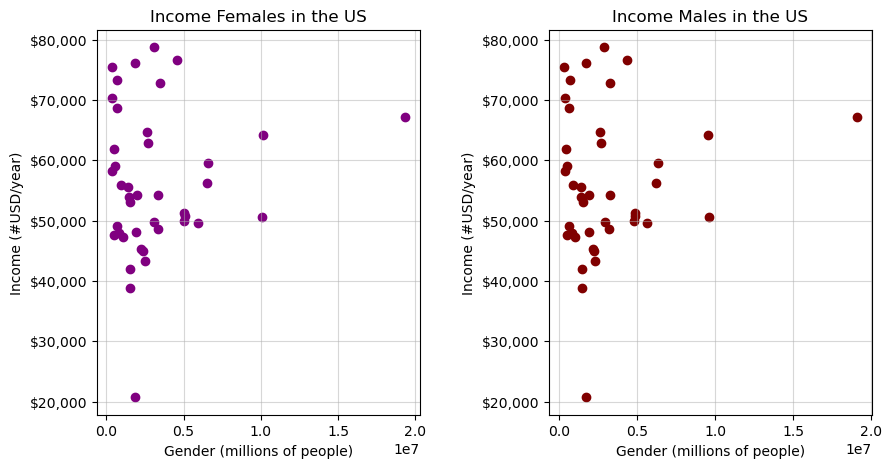

<Figure size 640x480 with 0 Axes>

In [31]:
#Create variables for formatting x and or y tick marks. 
fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)

#Create a scatter plot of both male and female's income. 
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

#Show female income for the US states. 
ax1.scatter(data.female, data.income, color = 'purple')
ax1.set_title('Income Females in the US')
ax1.set_xlabel('Gender (millions of people)')
ax1.set_ylabel('Income (#USD/year)')
ax1.grid(True, alpha = 0.5)
ax1.yaxis.set_major_formatter(tick)

#Show female income for the US states. 
ax2.scatter(data.male, data.income, color = 'maroon')
ax2.set_title('Income Males in the US')
ax2.set_xlabel('Gender (millions of people)')
ax2.set_ylabel('Income (#USD/year)')
ax2.grid(True, alpha = 0.5)
ax2.yaxis.set_major_formatter(tick)

#Set the spacing between subplots.
plt.subplots_adjust(wspace=0.4)

#Show the subplots. 
plt.show()
plt.clf()

2. Perform the histogram for each race to see the distributions of race across the states. 

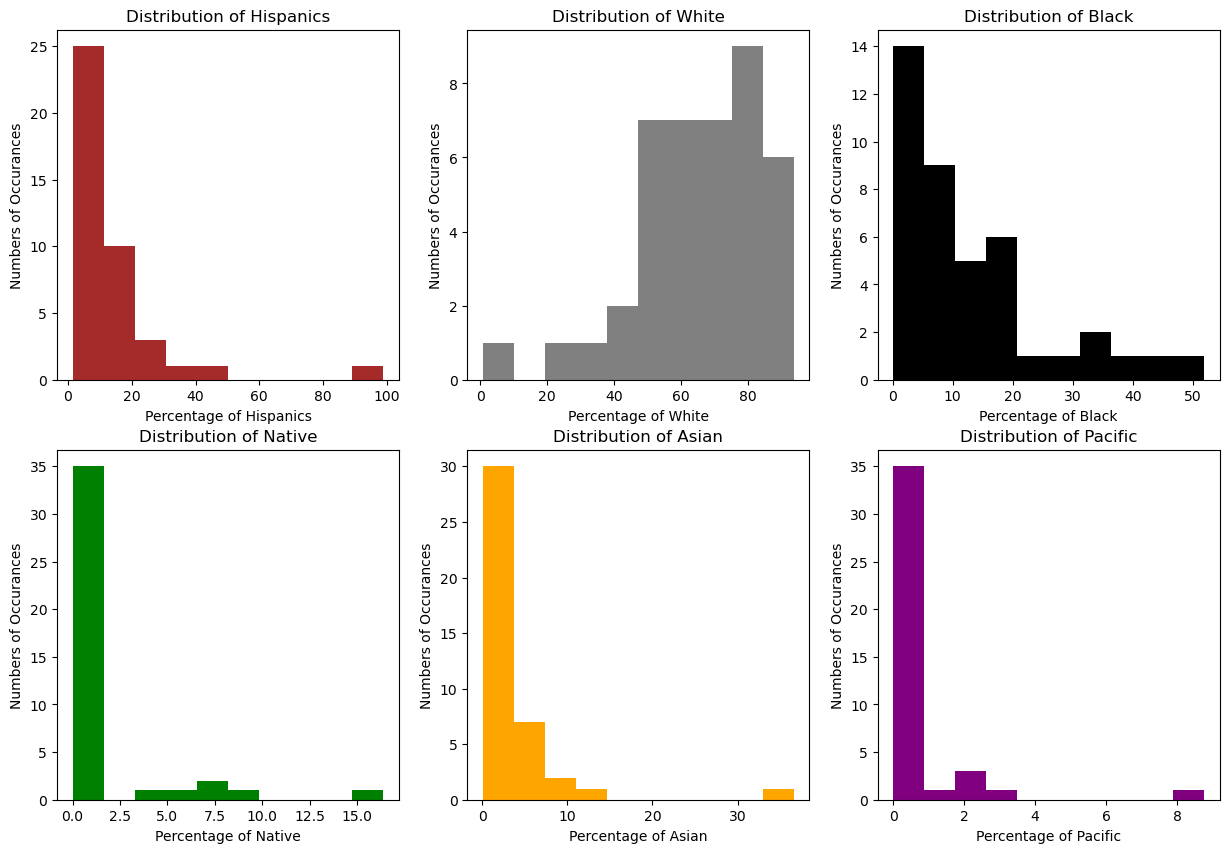

<Figure size 640x480 with 0 Axes>

In [32]:
# Create six subplots side by side with 2 rows and 3 columns.
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

axs[0, 0].hist(data['hispanic'], color = 'brown')
axs[0, 0].set_title('Distribution of Hispanics')
axs[0, 0].set_xlabel('Percentage of Hispanics')
axs[0, 0].set_ylabel('Numbers of Occurances')

axs[0, 1].hist(data['white'], color = 'gray')
axs[0, 1].set_title('Distribution of White')
axs[0, 1].set_xlabel('Percentage of White')
axs[0, 1].set_ylabel('Numbers of Occurances')

axs[0, 2].hist(data['black'], color = 'black')
axs[0, 2].set_title('Distribution of Black')
axs[0, 2].set_xlabel('Percentage of Black')
axs[0, 2].set_ylabel('Numbers of Occurances')

axs[1, 0].hist(data['native'], color = 'green')
axs[1, 0].set_title('Distribution of Native')
axs[1, 0].set_xlabel('Percentage of Native')
axs[1, 0].set_ylabel('Numbers of Occurances')

axs[1, 1].hist(data['asian'], color = 'orange')
axs[1, 1].set_title('Distribution of Asian')
axs[1, 1].set_xlabel('Percentage of Asian')
axs[1, 1].set_ylabel('Numbers of Occurances')

axs[1, 2].hist(data['pacific'], color = 'purple')
axs[1, 2].set_title('Distribution of Pacific')
axs[1, 2].set_xlabel('Percentage of Pacific')
axs[1, 2].set_ylabel('Numbers of Occurances')

# Show the subplots.
plt.show()
plt.clf()

3. View the percentage of race that makes up for let's say, North Dakota, my home state. ;)

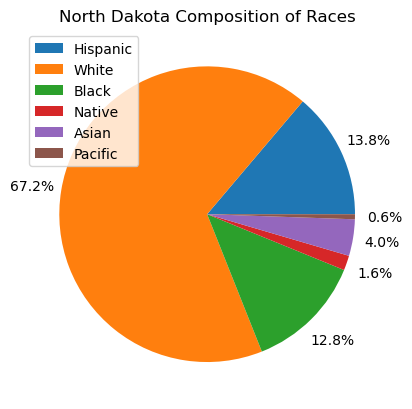

<Figure size 640x480 with 0 Axes>

In [73]:
data[['hispanic', 'white', 'black', 'native', 'asian', 'pacific']].sum().plot(kind='pie', autopct='%1.1f%%', labels=None, pctdistance=1.2, wedgeprops=dict(linewidth=1))
plt.title('North Dakota Composition of Races')
plt.legend(labels=['Hispanic','White','Black','Native','Asian', 'Pacific'], loc = 2)
plt.show()
plt.clf()

## Summary ##

This notebook went through the process of cleaning the raw csv files and analyzing aspects of the US Census Data. This notebook helps me understand better on how to perform data munching, wrangling, transformation and cleaning. 